In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical


# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn


#  manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='/content/dasiy'
FLOWER_DANDI_DIR='/content/dandelion'
FLOWER_ROSE_DIR='/content/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type
    
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

FileNotFoundError: ignored

In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 480/480 [00:01<00:00, 319.13it/s]

976


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 496/496 [00:01<00:00, 378.12it/s]

1472


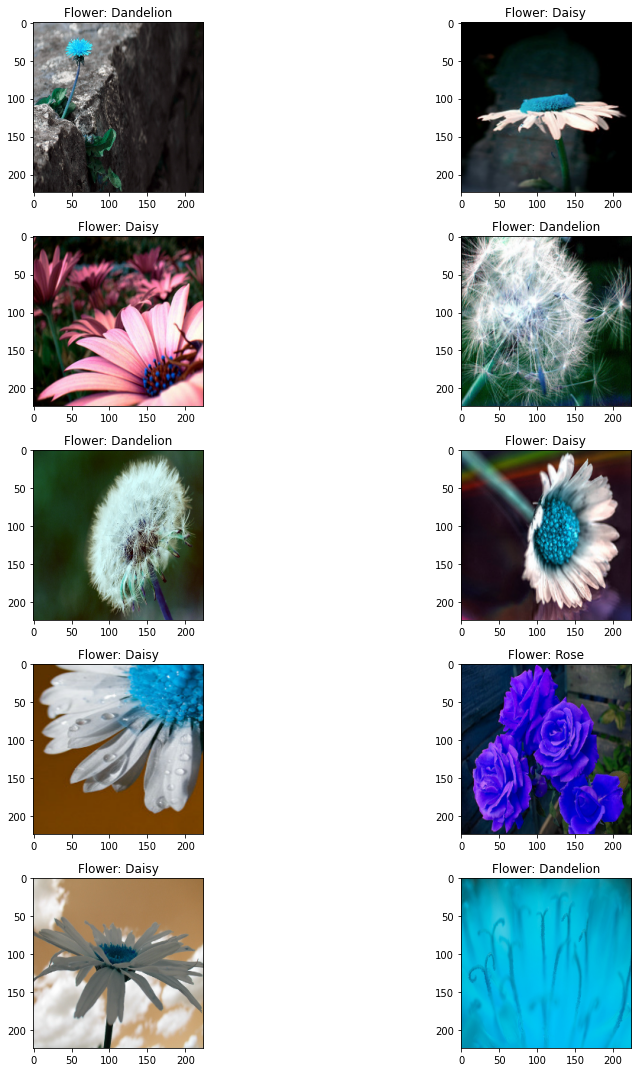

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()


        

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,3)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
batch_size=128
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
model=Sequential()
model.add(Conv2D(64, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu', input_shape =(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2)))

model.add(Conv2D(128, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2)))


model.add(Conv2D(256, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2)))

model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2)))

model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3),strides=(1),padding="SAME", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))


NameError: ignored

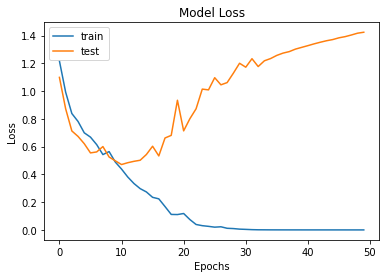

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

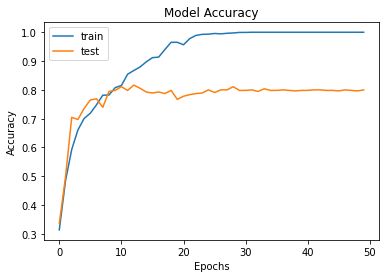

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()